In [636]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# 1.Load the dataset into python environment

In [637]:
data=pd.read_csv('/Users/geethuvishnu/Desktop/titanic_dataset.csv')

In [638]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.Make 'Passengerld' as the index column

In [639]:
data = pd.read_csv('/Users/geethuvishnu/Desktop/titanic_dataset.csv',index_col='PassengerId')

In [640]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3.Checking basic details of the data

In [641]:
data.shape

(891, 11)

In [642]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [643]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [644]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

/Users/geethuvishnu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


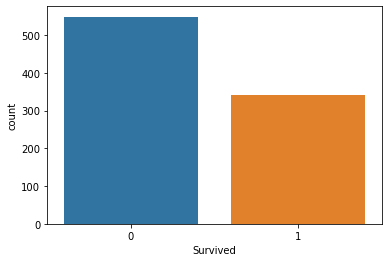

In [645]:
sns.countplot(data['Survived']);

/Users/geethuvishnu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


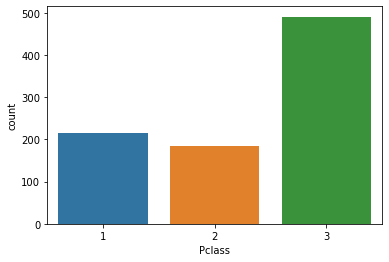

In [646]:
sns.countplot(data['Pclass']);

/Users/geethuvishnu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


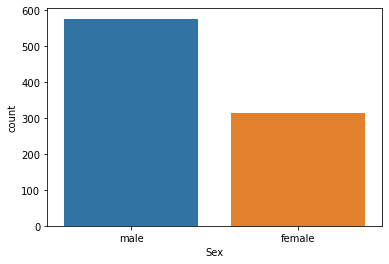

In [647]:
sns.countplot(data['Sex']);

/Users/geethuvishnu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

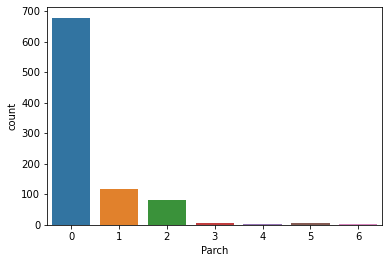

In [648]:
sns.countplot(data['Parch'])

/Users/geethuvishnu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

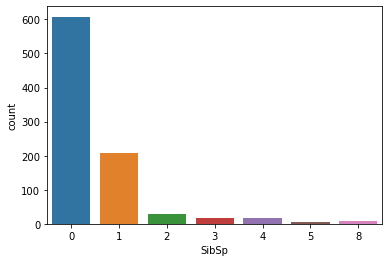

In [649]:
sns.countplot(data['SibSp'])

# 4.Fill in all the missing values present in all the columns in the dataset

In [650]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

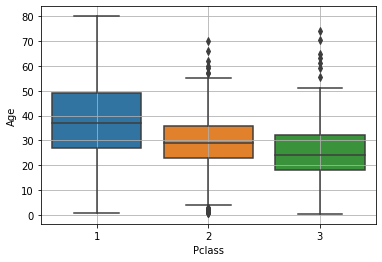

In [651]:
sns.boxplot(x='Pclass',y='Age',data=data)
plt.grid(True)

In [652]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

In [653]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [654]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [655]:
data.drop('Cabin',axis=1,inplace=True)

In [656]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [657]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [658]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 4.Check and handle outliers in atleast three columns in the dataset

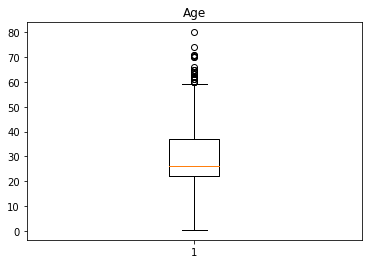

In [659]:
plt.boxplot(data['Age'])
plt.title('Age')
plt.show();

In [660]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

In [661]:
print(Q1)
print(Q2)
print(Q3)

22.0
26.0
37.0


In [662]:
data['Age'].median()

26.0

In [663]:
IQR = Q3-Q1

In [664]:
IQR

15.0

In [665]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [666]:
low_lim

-0.5

In [667]:
up_lim

59.5

In [668]:
outliers = []
for i in data['Age']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)

In [669]:
outliers

[66.0,
 65.0,
 71.0,
 70.5,
 61.0,
 62.0,
 63.0,
 65.0,
 61.0,
 60.0,
 64.0,
 65.0,
 63.0,
 71.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 80.0,
 70.0,
 60.0,
 60.0,
 70.0,
 62.0,
 74.0]

In [670]:
# checking index of outliers
ind = data['Age']>up_lim
data.loc[ind].index

Int64Index([ 34,  55,  97, 117, 171, 253, 276, 281, 327, 367, 439, 457, 484,
            494, 546, 556, 571, 588, 626, 631, 673, 685, 695, 746, 830, 852],
           dtype='int64', name='PassengerId')

In [671]:
data.drop([ 34,  55,  97, 117, 171, 253, 276, 281, 327, 367, 439, 457, 484,
            494, 546, 556, 571, 588, 626, 631, 673, 685, 695, 746, 830, 852],inplace=True)

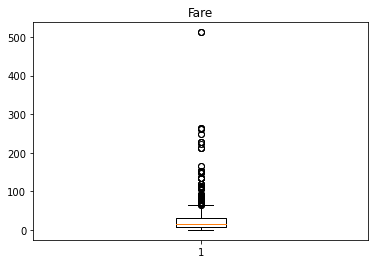

In [672]:
# Checking outlier in column of 'Fare'
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.show();

In [673]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

In [674]:
print(Q1)
print(Q2)
print(Q3)

7.8958
14.4542
30.5


In [675]:
data['Fare'].median()

14.4542

In [676]:
IQR = Q3-Q1

In [677]:
IQR

22.6042

In [678]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.0105
64.4063


In [679]:
ind = data['Fare']>up_lim
data.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            790, 793, 803, 821, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=112)

In [680]:
outliers = []
for i in data['Fare']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)
    

In [681]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55

#5. Do min max scaling on the feature dataset (Take survived as Target)

<AxesSubplot:>

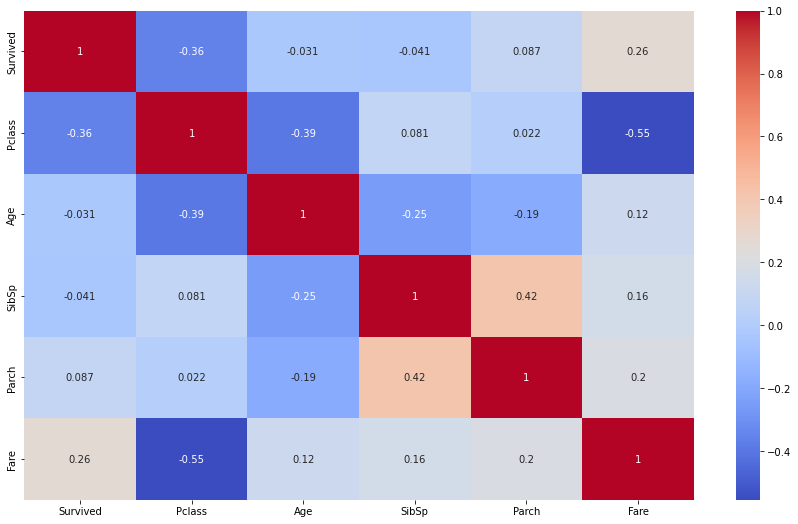

In [682]:
# Correlation matrix
corr = data.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [683]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [684]:
data1 = data.drop(columns = ['Name','Ticket'],axis = 1)

In [685]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,24.0,1,2,23.4500,S


In [686]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']

for col in cols:
    data1[col] = LabelEncoder().fit_transform(data1[col])
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [687]:
# Train-test Split

In [688]:
from sklearn import preprocessing

In [689]:
from sklearn.model_selection import train_test_split

In [690]:
x = data1.drop('Survived',axis=1)
y = data1['Survived']

In [691]:
x_train, x_test, y_train ,y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [692]:
from sklearn.linear_model import LinearRegression

In [693]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
predictions = model.predict(x_test)

In [694]:
from sklearn.metrics import mean_squared_error,r2_score

In [695]:
print('The mean squared error value is : ',mean_squared_error(y_test,predictions))
print('The r squared value is : ',r2_score(y_test,predictions))

The mean squared error value is :  0.13158344467495453
The r squared value is :  0.46419579378548104


In [696]:
# Min max Scaling

In [697]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000,2
888,1,0,19.0,0,0,30.0000,2
889,3,0,24.0,1,2,23.4500,2


In [698]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

In [699]:
x = min_max_scaler.fit_transform(x)

In [700]:
type(x)

numpy.ndarray

In [701]:
x = pd.DataFrame(x,columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [702]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.368385,0.125,0.0,0.014151,1.0
1,0.0,0.0,0.641516,0.125,0.0,0.139136,0.0
2,1.0,0.0,0.436668,0.000,0.0,0.015469,1.0
3,0.0,0.0,0.590304,0.125,0.0,0.103644,1.0
4,1.0,1.0,0.590304,0.000,0.0,0.015713,1.0


In [703]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,0.665896,0.641618,0.470526,0.066474,0.063969,0.062198,0.768208
std,0.413101,0.479802,0.201768,0.139455,0.134248,0.096883,0.395688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.368385,0.000000,0.000000,0.015412,0.500000
50%,1.000000,1.000000,0.419597,0.000000,0.000000,0.028213,1.000000
75%,1.000000,1.000000,0.607375,0.125000,0.000000,0.059532,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [704]:
data1.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],axis=1,inplace=True)

In [705]:
data1.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [706]:
data1 = pd.concat([data1,x],axis=1)

In [707]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42,test_size=0.2)

In [708]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)
predictions = model.predict(x_test)

In [709]:
print('The mean squared error value is : ',mean_squared_error(y_test, predictions))
print('The r squared value is : ',r2_score(y_test,predictions))

The mean squared error value is :  0.13158344467495484
The r squared value is :  0.4641957937854798
